In [2]:
!pip install alpha_vantage

In [3]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import timedelta
%matplotlib inline

In [4]:
api_key = '80A8HGQ6DP7XJWWU'

In [5]:
ts = CryptoCurrencies(key=api_key, output_format='pandas')

In [6]:
ETH, ETH_meta_data = ts.get_digital_currency_daily(symbol='ETH', market='USD')
OMG, OMG_meta_data = ts.get_digital_currency_daily(symbol='OMG', market='USD')
QTUM, QTUM_meta_data = ts.get_digital_currency_daily(symbol='QTUM', market='USD')
GNT, GNT_meta_data = ts.get_digital_currency_daily(symbol='GNT', market='USD')

In [11]:
ETH.head()

,. open (USD),. open (USD),. high (USD),. high (USD),. low (USD),. low (USD),. close (USD),. close (USD),volume,market cap (USD)
Date,,,,,,,,,,
2015-08-08,3.00000,3.00000,3.00000,3.00000,0.15000,0.15000,1.19999,1.19999,1942.888147,2331.446348
2015-08-09,1.19999,1.19999,1.19999,1.19999,1.19999,1.19999,1.19999,1.19999,0.000000,0.000000
2015-08-10,1.19999,1.19999,1.19999,1.19999,1.19999,1.19999,1.19999,1.19999,0.000000,0.000000
2015-08-11,1.19999,1.19999,1.19999,1.19999,0.65038,0.65038,0.99000,0.99000,9234.568705,9142.223018
2015-08-12,0.99000,0.99000,1.28800,1.28800,0.90500,0.90500,1.28800,1.28800,1736.114983,2236.116098


In [14]:
ETH = ETH.iloc[:, 7:]
OMG = OMG.iloc[:, 7:]
QTUM = QTUM.iloc[:, 7:]
GNT = GNT.iloc[:, 7:]

In [15]:
ETH.head()

,. close (USD),volume,market cap (USD)
Date,,,
2015-08-08,1.19999,1942.888147,2331.446348
2015-08-09,1.19999,0.000000,0.000000
2015-08-10,1.19999,0.000000,0.000000
2015-08-11,0.99000,9234.568705,9142.223018
2015-08-12,1.28800,1736.114983,2236.116098


In [16]:
col_names = {'. close (USD)': 'price_USD', 'market cap (USD)': 'marketcap_USD'}
ETH.rename(columns=col_names, inplace=True)
OMG.rename(columns=col_names, inplace=True)
QTUM.rename(columns=col_names, inplace=True)
GNT.rename(columns=col_names, inplace=True)

In [17]:
isinstance(ETH.index, pd.DatetimeIndex)

False

In [18]:
ETH.index = pd.to_datetime(ETH.index)
OMG.index = pd.to_datetime(OMG.index)
QTUM.index = pd.to_datetime(QTUM.index)
GNT.index = pd.to_datetime(GNT.index)

In [19]:
isinstance(ETH.index, pd.DatetimeIndex)

True

In [20]:
timedifference = [0, 1, 2, 5, 7]
timedifference_str = ['0', '1', '2', '5', '7']
altcoins = [OMG, QTUM, GNT]
altcoins_str = ['OMG', 'QTUM', 'GNT']
original_index = ETH.index

In [21]:
for i in range(len(timedifference)):
    eth_shift = timedelta(days=timedifference[i])
    ETH.index = original_index + eth_shift
    for j in range(len(altcoins)):
        locals()[altcoins_str[j] + 'ETH' + timedifference_str[i]] = \
        pd.concat([altcoins[j], ETH], axis=1, keys=[altcoins_str[j], 'ETH']).dropna()

In [22]:
OMGETH0.head()

OMG                                     ETH                \
           price_USD        volume marketcap_USD   price_USD        volume   
Date                                                                         
2017-07-16   0.38252  8.908782e+05  3.407787e+05  156.889812  2.184469e+06   
2017-07-17   0.58000  1.025945e+06  5.950479e+05  189.103076  1.743793e+06   
2017-07-18   0.76000  1.958274e+06  1.488288e+06  225.285850  2.651634e+06   
2017-07-19   0.56100  9.423796e+05  5.286750e+05  193.375294  2.320837e+06   
2017-07-20   0.66746  8.515871e+05  5.684003e+05  225.189588  1.973859e+06   

                          
           marketcap_USD  
Date                      
2017-07-16  3.427209e+08  
2017-07-17  3.297566e+08  
2017-07-18  5.973756e+08  
2017-07-19  4.487925e+08  
2017-07-20  4.444926e+08

In [23]:
price_df = pd.concat([OMGETH0.ETH.price_USD, OMGETH1.ETH.price_USD, OMGETH2.ETH.price_USD, \
                    OMGETH5.ETH.price_USD, OMGETH7.ETH.price_USD, OMGETH0.OMG.price_USD, \
                    QTUMETH0.QTUM.price_USD, GNTETH0.GNT.price_USD], \
                   axis=1, keys=['ETH0', 'ETH1', 'ETH2', 'ETH5', 'ETH7', 'OMG', 'QTUM', 'GNT']).dropna()
price_df.head()

,ETH0,ETH1,ETH2,ETH5,ETH7,OMG,QTUM,GNT
Date,,,,,,,,
2017-10-14,338.697283,337.000728,303.065521,296.515151,311.902404,8.0410,12.594000,0.21406
2017-10-15,336.133477,338.697283,337.000728,298.511604,309.545919,7.9833,10.155876,0.19533
2017-10-16,333.644907,336.133477,338.697283,302.732224,296.515151,7.8100,11.500829,0.21468
2017-10-17,316.649654,333.644907,336.133477,303.065521,298.511604,8.0001,12.059999,0.21680
2017-10-18,313.662459,316.649654,333.644907,337.000728,302.732224,7.7982,11.376291,0.21530


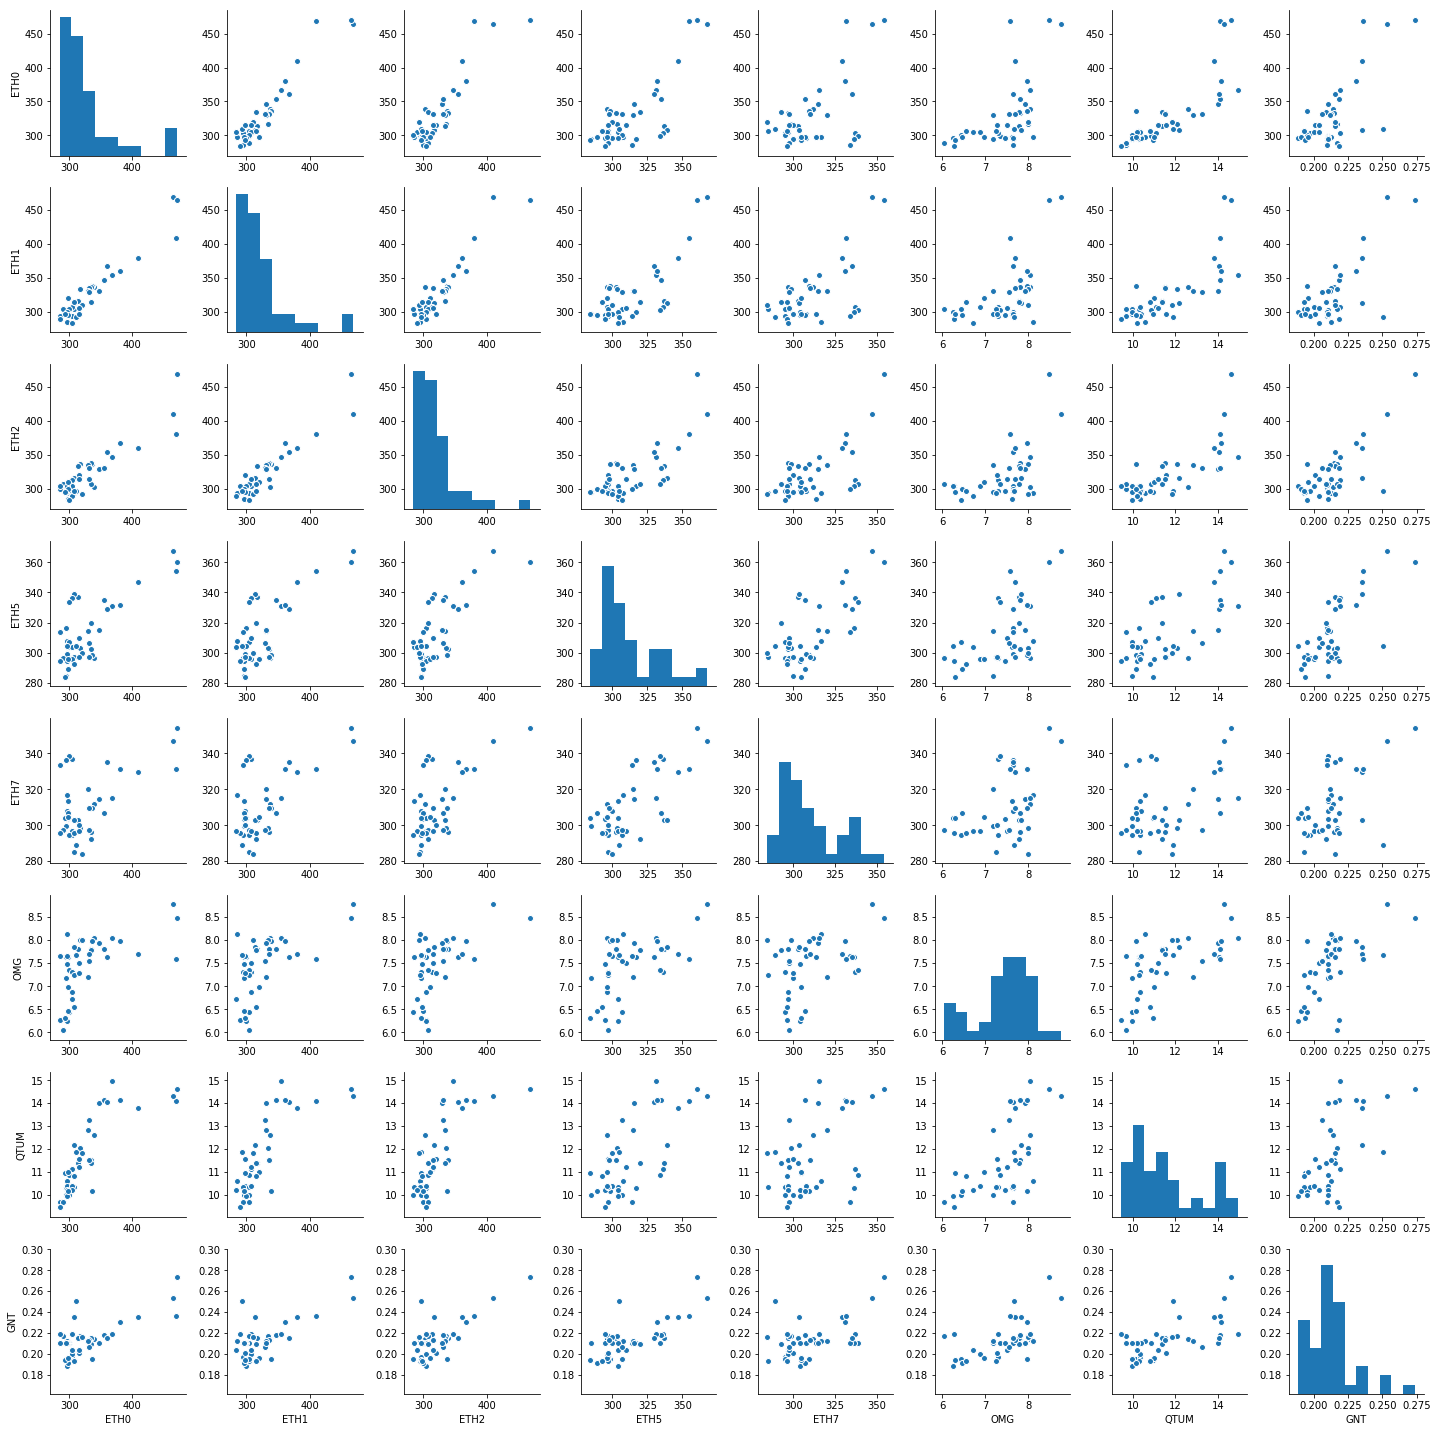

In [24]:
sns.pairplot(price_df)

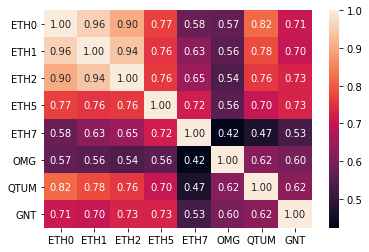

In [25]:
sns.heatmap(price_df.corr(), annot=True, fmt='.2f')